In [53]:
import numpy as np
import matplotlib.pyplot as plt

In [54]:
plot_x = np.linspace(-1, 6, 141)

In [55]:
# plot_x

In [56]:
plot_y = (plot_x - 2.5)**2 -1

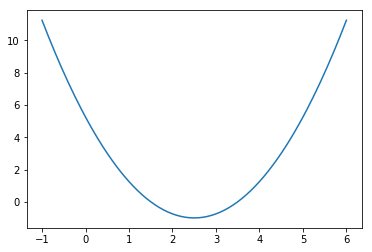

In [57]:
plt.plot(plot_x, plot_y)
plt.show()

In [58]:
#求导数，代表梯度方向
def dJ(theta):
    return 2*(theta - 2.5)

In [59]:
def J(theta):
    return (theta - 2.5)**2-1

In [60]:
# 由于eta步长关系，未必能找到损失函数极值点，最好情况为无限接近，所以求解的损失函数设置一个阈值epsilon，只要找到损失函数小于该阈值即可

eta = 0.1 # eta 表示梯度下降学习率，是一个超参数
epsilon = 1e-8 #设置一个阈值epsilon

theta = 0.0
while True:
    gradient = dJ(theta)
    last_theta = theta
    theta = theta - eta * gradient  #求导数，代表梯度方向，eta代表步长或学习率，求出下一个较小值，直到满足阈值要求
    
    if(abs(J(theta) - J(last_theta)) < epsilon):
        break

print(theta)
print(J(theta))

2.499891109642585
-0.99999998814289


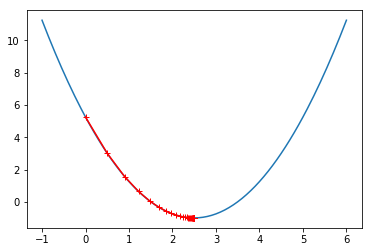

In [61]:
theta = 0.0
theta_history = [theta]

while True:
    gradient = dJ(theta)
    last_theta = theta
    theta = theta - eta * gradient 
    
    theta_history.append(theta)
    if(abs(J(theta) - J(last_theta)) < epsilon):
        break

plt.plot(plot_x, J(plot_x))
plt.plot(np.array(theta_history), J(np.array(theta_history)), color='r', marker='+')
plt.show()

In [62]:
len(theta_history)

46

In [63]:
def gradient_descent(initial_theta, eta, epsilon=1e-8):
    theta = initial_theta
    theta_history.append(initial_theta)

    while True:
        gradient = dJ(theta)
        last_theta = theta
        theta = theta - eta * gradient 

        theta_history.append(theta)
        if(abs(J(theta) - J(last_theta)) < epsilon):
            break
            
            
def plot_theta_history():
    plt.plot(plot_x, J(plot_x))
    plt.plot(np.array(theta_history), J(np.array(theta_history)), color='r', marker='+')
    plt.show()

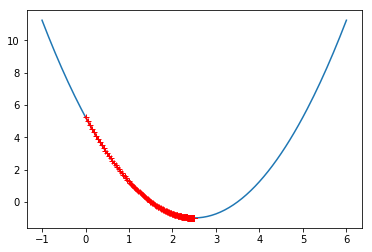

In [64]:
eta = 0.01
theta_history = []

gradient_descent(0.0, eta)
plot_theta_history()

In [65]:
len(theta_history)

424

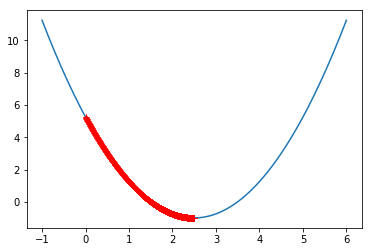

In [66]:
eta = 0.001
theta_history = []

gradient_descent(0.0, eta)
plot_theta_history()

In [67]:
len(theta_history)

3682

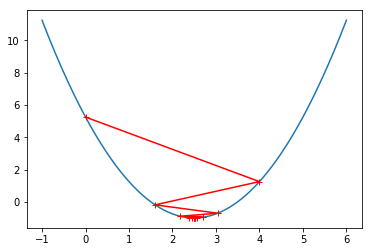

In [68]:
eta = 0.8
theta_history = []

gradient_descent(0.0, eta)
plot_theta_history()

In [69]:
eta = 1.1
theta_history = []

gradient_descent(0.0, eta)
plot_theta_history()

OverflowError: (34, 'Result too large')

### 解决J（theta）无穷大问题
---> 11         if(abs(J(theta) - J(last_theta)) < epsilon):


In [70]:
def J(theta):
    try:
      return (theta - 2.5)**2-1
    except:
      return float('inf')

In [71]:
eta = 1.1
theta_history = []

gradient_descent(0.0, eta)

KeyboardInterrupt: 

### 运行以上代码会一直运行，不会终止，需手工中断
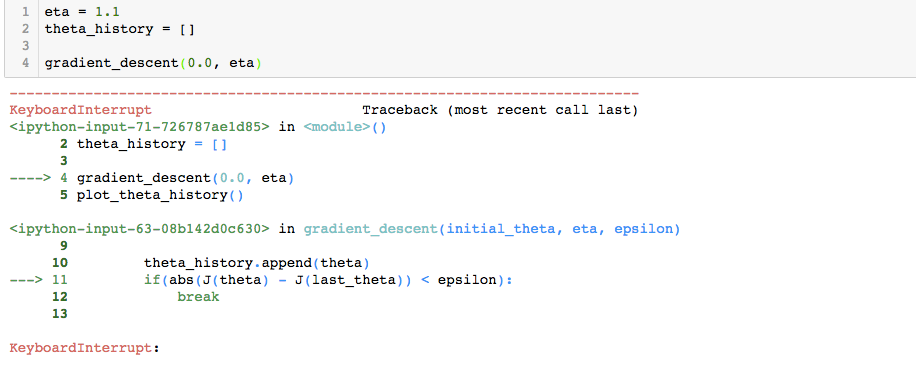

### 死循环问题
> eta = 1.1过大， 使得if(abs(J(theta) - J(last_theta)) < epsilon)条件永远不能满足，会造成死循环问题，增加n_iters 来限制循环次数


In [72]:
def gradient_descent(initial_theta, eta, n_iters = 1e4, epsilon=1e-8):
    theta = initial_theta
    theta_history.append(initial_theta)
    i_iter = 0

    while i_iter < n_iters:
        gradient = dJ(theta)
        last_theta = theta
        theta = theta - eta * gradient 

        theta_history.append(theta)
        if(abs(J(theta) - J(last_theta)) < epsilon):
            break
        i_iter +=1    
            

In [73]:
eta = 1.1
theta_history = []

gradient_descent(0.0, eta)

In [74]:
len(theta_history)

10001

In [75]:
theta_history[-1]

nan

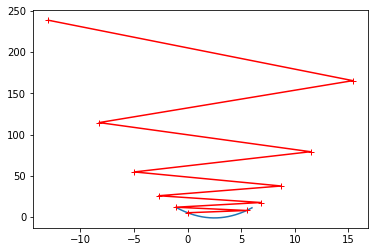

In [76]:
eta = 1.1
theta_history = []

gradient_descent(0.0, eta, n_iters=10)
plot_theta_history()#学习率eta过大，梯度向外取值越来越大

In [77]:
theta_history

[0.0,
 5.5,
 -1.1000000000000005,
 6.820000000000001,
 -2.684000000000002,
 8.720800000000004,
 -4.964960000000007,
 11.457952000000008,
 -8.249542400000012,
 15.399450880000016,
 -12.979341056000022]